In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

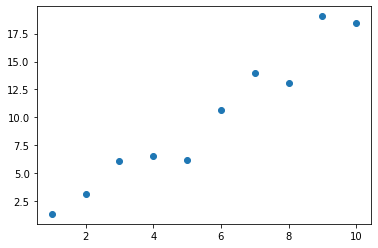

In [ ]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))

plt.scatter(X[0],X[1])

In [ ]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
1,1.364161,3.120165,6.136756,6.549182,6.213906,10.675874,13.945237,13.104844,19.053338,18.407782


In [ ]:
X.shape

(2, 10)

Mean vector:  [5.5        9.85712455]
[[-4.5        -3.5        -2.5        -1.5        -0.5         0.5
   1.5         2.5         3.5         4.5       ]
 [-8.49296375 -6.73695908 -3.72036833 -3.30794281 -3.643219    0.81874932
   4.08811273  3.24771992  9.19621374  8.55065728]]


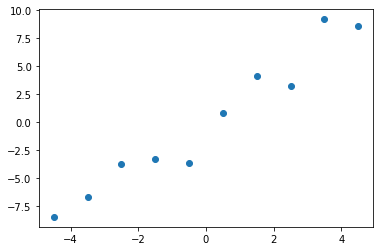

In [ ]:
#Find m - mean vector, and Xcentered - X-mean
#Your code is here
Xcentered = X - X.mean(axis=1, keepdims=True)
m = np.mean(X, axis=1)

print("Mean vector: ", m)
print(Xcentered)

plt.scatter(Xcentered[0],Xcentered[1])

In [ ]:
Xcentered.shape

(2, 10)

In [ ]:
import pandas as pd
pd.DataFrame(Xcentered)

,0,1,2,3,4,5,6,7,8,9
0,-4.500000,-3.500000,-2.500000,-1.500000,-0.500000,0.500000,1.500000,2.50000,3.500000,4.500000
1,-8.492964,-6.736959,-3.720368,-3.307943,-3.643219,0.818749,4.088113,3.24772,9.196214,8.550657


In [ ]:
covmat = np.cov(Xcentered)
np.cov(Xcentered)

array([[ 9.16666667, 18.13418751],
       [18.13418751, 37.90983442]])

In [ ]:
np.cov(Xcentered)[0,0]

9.166666666666666

In [ ]:
covmat = np.cov(Xcentered)
print(covmat, "\n")
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print("Covariance X and Y: ", np.cov(Xcentered)[0,1])

[[ 9.16666667 18.13418751]
 [18.13418751 37.90983442]] 

Variance of X:  9.166666666666666
Variance of Y:  37.90983441954132
Covariance X and Y:  18.134187514655196


Находим собственные векторы матрицы ковариаций и проецируем на самый большой вектор (с самым большим собственным значением) все точки

In [ ]:
eignums, vecs = np.linalg.eig(covmat)
v = vecs[:,np.argmax(eignums)]
Xnew = np.dot(v,Xcentered)
print(Xnew)

[ 9.60492303  7.58872475  4.43761013  3.63104755  3.49764716 -0.95475315
 -4.33344114 -4.01208075 -9.80281257 -9.656865  ]


In [ ]:
eignums

array([ 0.39972898, 46.6767721 ])

In [ ]:
vecs

array([[-0.90030848, -0.43525238],
       [ 0.43525238, -0.90030848]])

In [ ]:
vecs[:,0]

array([-0.90030848,  0.43525238])

In [ ]:
vecs[:,1]

array([-0.43525238, -0.90030848])

In [ ]:
np.argmax(eignums)

1

In [ ]:
v

array([-0.43525238, -0.90030848])

In [ ]:
n = 3 #номер элемента случайной величины
Xrestored = np.dot(Xnew[n],v) + m
print('Restored: ', Xrestored)
print('Original: ', X[:,n])

Restored:  [3.9195779  6.58806164]
Original:  [4.         6.54918173]


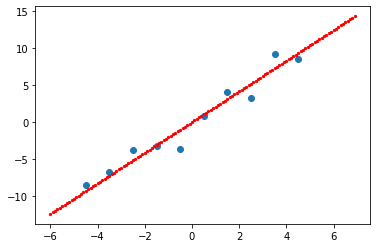

In [ ]:
k= v[1]/v[0]

x1 = np.arange(-6,7,0.1)
y1 = [k*elem for elem in x1]
plt.scatter(Xcentered[0],Xcentered[1])
plt.scatter(x1,y1,color='red',s=5)
plt.show()

In [ ]:
100 * max(eignums)/sum(eignums)

99.15089487339209

In [ ]:
from sklearn.decomposition import PCA

#Apply PCA with n_components=1 to transposed Xcentered
#Your code is here
pca = PCA(n_components=1)
X_pca = pca.fit_transform(Xcentered.T)

In [ ]:
print(v)
print(pca.components_)

[-0.43525238 -0.90030848]
[[0.43525238 0.90030848]]


In [ ]:
pca.explained_variance_

array([46.6767721])

In [ ]:
max(eignums)

46.676772102057356

In [ ]:
pca.explained_variance_ratio_[0] * 100

99.15089487339208

In [ ]:
###

In [ ]:
def pca_np_1(x):

#centering data
  m = np.mean(x, axis =0)
  x_centered = x - m
#calculating covariance matrix
  x_cov=np.cov(x_centered.T)
#eigendecomposition
  eigenvals, eigenvecs = np.linalg.eig(x_cov)
#sorting
  i= np.argsort(eigenvals)[::-1]
  eigenvecs = eigenvecs[:,i]
  eigenvals= eigenvals[i]
  total_egnvalues = sum(eigenvals)
  var_exp = [(i/total_egnvalues) for i in sorted(eigenvals, reverse=True)]
  var_exp_ratio=round(sum(var_exp)*100, 1)

  return(eigenvals, eigenvecs, m,var_exp,var_exp_ratio)

In [ ]:

data_evals, data_evecs,data_mean,data_exp,data_exp_ration = pca_np_1(X.T)
print("eigenvalues:", iris_evals)
print("eigenvectors:", iris_evecs)

eigenvalues: [46.6767721   0.39972898]
eigenvectors: [[-0.43525238 -0.90030848]
 [-0.90030848  0.43525238]]


In [ ]:
print("exp_ratio:", iris_exp)
print("exp_ratio:", iris_exp_ration)

exp_ratio: [0.9915089487339209, 0.008491051266079096]
exp_ratio: 100.0


In [ ]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
 
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean

    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        #self.sorted_components = self.eigen_values.argsort()[::-1]
        
        #self.projection_matrix = self.eigen_vectors[:,self.sorted_components][:,:self.no_of_components]
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance =self.eigen_values[self.sorted_components[:self.no_of_components]]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()
        return self  

In [ ]:
pca=convers_pca(no_of_components=1)
pca.fit(X.T)

In [ ]:
print(pca.eigen_values)
print(pca.eigen_vectors)
print(pca.sorted_components)


[ 0.39972898 46.6767721 ]
[[-0.90030848  0.43525238]
 [-0.43525238 -0.90030848]]
[1 0]


In [ ]:
print(pca.projection_matrix)
print(pca.explained_variance)
print(pca.explained_variance_ratio)

[[-0.43525238 -0.90030848]]
[46.6767721]
[0.99150895]


In [ ]:
pca=convers_pca(no_of_components=2)
pca.fit(Xcentered.T)

In [ ]:
print(pca.eigen_values)
print(pca.eigen_vectors)
print(pca.sorted_components)

[ 0.39972898 46.6767721 ]
[[-0.90030848  0.43525238]
 [-0.43525238 -0.90030848]]
[1 0]


In [ ]:
print(pca.projection_matrix)
print(pca.explained_variance)
print(pca.explained_variance_ratio)

[[-0.43525238 -0.90030848]
 [-0.90030848  0.43525238]]
[46.6767721   0.39972898]
[0.99150895 0.00849105]


In [ ]:
from sklearn.decomposition import PCA

#Apply PCA with n_components=1 to transposed Xcentered
#Your code is here
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xcentered.T)

In [ ]:
pca.explained_variance_ratio_

array([0.99150895, 0.00849105])

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.T)

In [ ]:
pca.explained_variance_ratio_

array([0.99150895, 0.00849105])